# COVID-19: A Contrast Between Hong Kong and Ontario Canada

Our model reveals that Ontario is reaching the peak of the pandemic whilst Hong Kong has passed the peak as of May 2020. Ontario and Canada in general seem to have ‘flattened the curve’ but with that comes a longer period of pandemic. There seem to be some ‘day of week’ effects in both Ontario and Hong Kong but further causal analysis is required to determine the source of these differences. In addition, the lockdown in Ontario seem to have significant effects in decreasing daily confirmed cases.

## Table of Contents

**I. [Canada](#canada)<br>
II. [China](#china)<br>
III. [Ontario](#ontario)<br>
IV. [Hong Kong](#hk)<br>
V. [Forecast daily confirmed cases](#forecast)<br>**

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
import warnings
%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
# Clone dataset from GitHub
if not os.path.exists('COVID-19'): 
    !git clone git@github.com:CSSEGISandData/COVID-19.git

^C


## Country/Region

In [3]:
# Import dataset and group by Country/Region
df_covid = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', header=0, squeeze=True)
df_covid = df_covid.groupby(['Country/Region']).agg('sum')
df_covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61


In [4]:
# Transpose dataframe
df = df_covid.drop(['Lat', 'Long'], axis = 1).transpose()
df.columns = df_covid.index.values
df.index = pd.to_datetime(df.index.values)

# First difference for daily confirmed cases
df = df.diff(axis = 0)[1:]

# Create day of week variable
df['dayofweek'] = df.index.values
df['dayofweek'] = df['dayofweek'].dt.dayofweek

df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,dayofweek
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
print('Number of rows/dates: {} \nNumber of columns/countries: {}'.format(list(df.shape)[0], list(df.shape)[1]))
print('{} columns with any missing values'.format(len(df.columns[df.isnull().mean()!=0])))

Number of rows/dates: 99 
Number of columns/countries: 188
0 columns with any missing values


### <a class="anchor" id="canada">Part I : Canada</a>

In [6]:
print('Total confirmed cases in Canada:', df['Canada'].sum())

Total confirmed cases in Canada: 54457.0


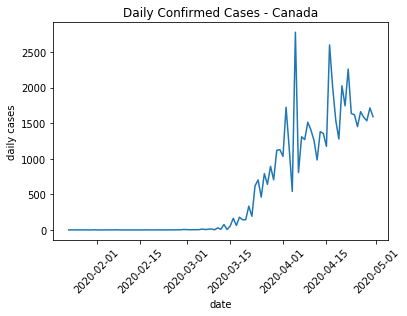

In [7]:
plt.plot(df.index.values, df['Canada'])
plt.title('Daily Confirmed Cases - Canada')
plt.ylabel('daily cases')
plt.xlabel('date')
plt.xticks(rotation=45);

In [8]:
df_ca = df[['Canada', 'dayofweek']]
max_ca = df_ca['Canada'].argmax()
print('Max daily case in Canada:', df_ca['Canada'][max_ca])
print('Date of max daily case in Canada:', df.index[max_ca].date())

Max daily case in Canada: 2778.0
Date of max daily case in Canada: 2020-04-05


In [9]:
# Days since first confirmed case in Canada
first_canada = df['Canada'].ne(0).idxmax()
df_ca['days_since_first_canada'] = (df_ca.index - first_canada).days

# Create day of week categorical indicator variables
df_ca = pd.concat([df_ca.drop('dayofweek', axis=1), pd.get_dummies(df['dayofweek'], prefix='dayofweek', prefix_sep='_')], axis=1)
df_ca = df_ca.drop('dayofweek_0', axis = 1)

df_ca[first_canada:].head()

,Canada,days_since_first_canada,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
2020-01-26,1.0,0,0,0,0,0,0,1
2020-01-27,0.0,1,0,0,0,0,0,0
2020-01-28,1.0,2,1,0,0,0,0,0
2020-01-29,0.0,3,0,1,0,0,0,0
2020-01-30,0.0,4,0,0,1,0,0,0


In [10]:
# Smoothing splines time trend
x_spline_canada = df_ca['days_since_first_canada'][first_canada:]
bs_canada = BSplines(x_spline_canada, df=[50], degree=[10])

In [11]:
# Generalized Additive Model
gam_bs_canada = GLMGam.from_formula('Canada ~ dayofweek_1 + dayofweek_2 + dayofweek_3 + dayofweek_4 + dayofweek_5 + dayofweek_6', data=df_ca[first_canada:], smoother=bs_canada, alpha=5000, family=sm.families.Poisson())
res_bs_canada = gam_bs_canada.fit()

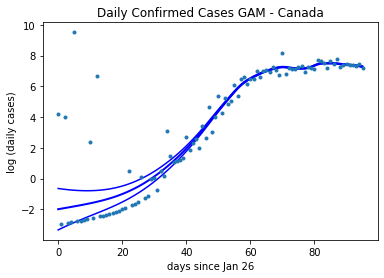

In [12]:
res_bs_canada.plot_partial(0, cpr=True)
plt.title('Daily Confirmed Cases GAM - Canada')
plt.ylabel('log (daily cases)')
plt.xlabel('days since Jan 26');

In [13]:
print(res_bs_canada.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Canada   No. Observations:                   96
Model:                         GLMGam   Df Residuals:                    78.56
Model Family:                 Poisson   Df Model:                        16.44
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -1958.1
Date:                Tue, 05 May 2020   Deviance:                       3431.3
Time:                        13:08:32   Pearson chi2:                 3.56e+03
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### <a class="anchor" id="china">Part II : China</a>

In [14]:
print('Total confirmed cases in China:', df['China'].sum())

Total confirmed cases in China: 83408.0


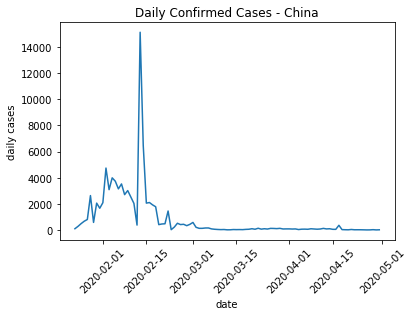

In [15]:
plt.plot(df.index.values, df['China'])
plt.title('Daily Confirmed Cases - China')
plt.ylabel('daily cases')
plt.xlabel('date')
plt.xticks(rotation=45);

In [16]:
df_cn = df[['China', 'dayofweek']]
max_cn = df_cn['China'].argmax()
print('Max daily case in China:', df_cn['China'][max_cn])
print('Date of max daily case in China:', df.index[max_cn].date())

Max daily case in China: 15136.0
Date of max daily case in China: 2020-02-13


In [17]:
# Replace the outlier by the average cases of the two neighboring dates
df_cn['China'][max_cn] = (df_cn['China'][max_cn - 1] + df_cn['China'][max_cn + 1])/2

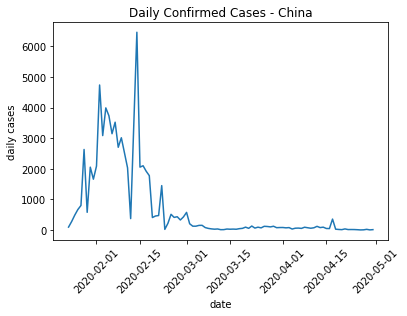

In [18]:
plt.plot(df.index.values, df_cn['China'])
plt.title('Daily Confirmed Cases - China')
plt.ylabel('daily cases')
plt.xlabel('date')
plt.xticks(rotation=45);

In [19]:
max_cn = df_cn['China'].argmax()
print('Max daily case:', df_cn['China'][max_cn])
print('Date of max daily case:', df.index[max_cn].date())

Max daily case: 6463.0
Date of max daily case: 2020-02-14


In [20]:
# Days since first confirmed case in China
first_china = df['China'].ne(0).idxmax()
df_cn['days_since_first_china'] = (df_cn.index - first_china).days

# Create day of week categorical indicator variables
df_cn = pd.concat([df_cn.drop('dayofweek', axis=1), pd.get_dummies(df['dayofweek'], prefix='dayofweek', prefix_sep='_')], axis=1)
df_cn = df_cn.drop('dayofweek_0', axis = 1)

df_cn[first_china:].head()

,China,days_since_first_china,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
2020-01-23,95.0,0,0,0,1,0,0,0
2020-01-24,277.0,1,0,0,0,1,0,0
2020-01-25,486.0,2,0,0,0,0,1,0
2020-01-26,669.0,3,0,0,0,0,0,1
2020-01-27,802.0,4,0,0,0,0,0,0


In [21]:
# Smoothing splines time trend
x_spline_china = df_cn['days_since_first_china'][first_china:]
bs_china = BSplines(x_spline_china, df=[90], degree=[10])

In [22]:
# Generalized Additive Model
gam_bs_china = GLMGam.from_formula('China ~ dayofweek_1 + dayofweek_2 + dayofweek_3 + dayofweek_4 + dayofweek_5 + dayofweek_6', data=df_cn[first_china:], smoother=bs_china, alpha=100000, family=sm.families.Poisson())
res_bs_china = gam_bs_china.fit()

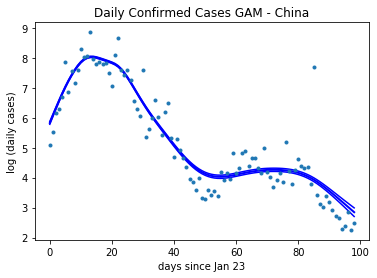

In [23]:
res_bs_china.plot_partial(0, cpr=True)
plt.title('Daily Confirmed Cases GAM - China')
plt.ylabel('log (daily cases)')
plt.xlabel('days since Jan 23');

In [24]:
print(res_bs_china.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  China   No. Observations:                   99
Model:                         GLMGam   Df Residuals:                    85.32
Model Family:                 Poisson   Df Model:                        12.68
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -7516.9
Date:                Tue, 05 May 2020   Deviance:                       14351.
Time:                        13:08:33   Pearson chi2:                 1.46e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Province/State

In [25]:
# Import dataset and group by Country/Region
df_covid = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', header=0, squeeze=True)
df_covid = df_covid.groupby(['Country/Region']).agg('sum')
df_covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [26]:
# Import dataset
df_covid = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', header=0, squeeze=True)

# Drop data without a Province/State
df_covid = df_covid.dropna(axis = 0)
df = df_covid.drop(['Lat', 'Long','Country/Region','Province/State'], axis = 1).transpose()
df.columns = list(df_covid['Province/State'][df_covid['Province/State'].isnull() == False])
df.index = pd.to_datetime(df.index.values)

# First difference for daily confirmed cases
df = df.diff(axis = 0)[1:]

# Create day of week variable
df['dayofweek'] = df.index.values
df['dayofweek'] = df['dayofweek'].dt.dayofweek

df.head()

,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,Alberta,British Columbia,...,Recovered,Northwest Territories,Yukon,Anguilla,British Virgin Islands,Turks and Caicos Islands,"Bonaire, Sint Eustatius and Saba",Falkland Islands (Malvinas),Saint Pierre and Miquelon,dayofweek
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2020-01-26,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2020-01-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
print('Number of rows/dates: {} \nNumber of columns/provinces: {}'.format(list(df.shape)[0], list(df.shape)[1]))
print('{} columns with any missing values'.format(len(df.columns[df.isnull().mean()!=0])))

Number of rows/dates: 99 
Number of columns/provinces: 83
0 columns with any missing values


### <a class="anchor" id="ontario">Part III : Ontario</a>

In [28]:
print('Total confirmed cases in Ontario:', df['Ontario'].sum())

Total confirmed cases in Ontario: 17395.0


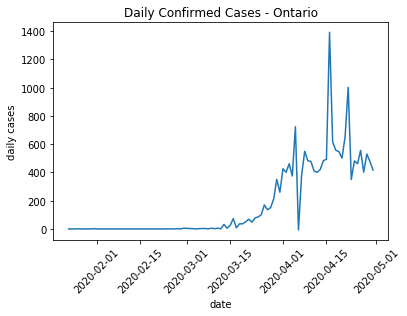

In [29]:
plt.plot(df.index.values, df['Ontario'])
plt.title('Daily Confirmed Cases - Ontario')
plt.ylabel('daily cases')
plt.xlabel('date')
plt.xticks(rotation=45);

In [30]:
df_on = df[['Ontario', 'dayofweek']]
max_on = df_on['Ontario'].argmax()
print('Max daily case in Ontario:', df_on['Ontario'][max_on])
print('Date of max daily case in Ontario:', df.index[max_on].date())

Max daily case in Ontario: 1393.0
Date of max daily case in Ontario: 2020-04-16


In [31]:
# Days since first confirmed case in Ontario
first_ontario = df['Ontario'].ne(0).idxmax()
df_on['days_since_first_ontario'] = (df_on.index - first_ontario).days

# Create day of week categorical indicator variables
df_on = pd.concat([df_on.drop('dayofweek', axis=1), pd.get_dummies(df['dayofweek'], prefix='dayofweek', prefix_sep='_')], axis=1)
df_on = df_on.drop('dayofweek_0', axis = 1)

# Lockdown and Quarantine Act fixed effects
df_on['lockdown'] = (df_on.index >= '2020-03-17')
df_on['quarantine_act'] = (df_on.index >= '2020-04-10')

df_on[first_ontario:].head()

,Ontario,days_since_first_ontario,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,lockdown,quarantine_act
2020-01-26,1.0,0,0,0,0,0,0,1,False,False
2020-01-27,0.0,1,0,0,0,0,0,0,False,False
2020-01-28,0.0,2,1,0,0,0,0,0,False,False
2020-01-29,0.0,3,0,1,0,0,0,0,False,False
2020-01-30,0.0,4,0,0,1,0,0,0,False,False


In [32]:
# Smoothing splines time trend
x_spline_ontario = df_on['days_since_first_ontario'][first_ontario:]
bs_ontario = BSplines(x_spline_ontario, df=[90], degree=[10])

In [33]:
# Generalized Additive Model
gam_bs_ontario = GLMGam.from_formula('Ontario ~ lockdown + quarantine_act + dayofweek_1 + dayofweek_2 + dayofweek_3 + dayofweek_4 + dayofweek_5 + dayofweek_6', data=df_on[first_ontario:], smoother=bs_ontario, alpha=1000, family=sm.families.Poisson())
res_bs_ontario = gam_bs_ontario.fit()

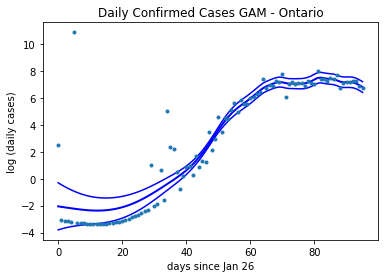

In [34]:
res_bs_ontario.plot_partial(0, cpr=True)
plt.title('Daily Confirmed Cases GAM - Ontario')
plt.ylabel('log (daily cases)')
plt.xlabel('days since Jan 26');

In [35]:
print(res_bs_ontario.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Ontario   No. Observations:                   96
Model:                         GLMGam   Df Residuals:                    75.71
Model Family:                 Poisson   Df Model:                        19.29
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                   -inf
Date:                Tue, 05 May 2020   Deviance:                       2330.2
Time:                        13:08:34   Pearson chi2:                 1.59e+03
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### <a class="anchor" id="hk">Part IV : Hong Kong</a>

In [36]:
df.rename(columns={'Hong Kong':'Hong_Kong'}, inplace=True)

In [37]:
print('Total confirmed cases in Hong Kong:', df['Hong_Kong'].sum())

Total confirmed cases in Hong Kong: 1037.0


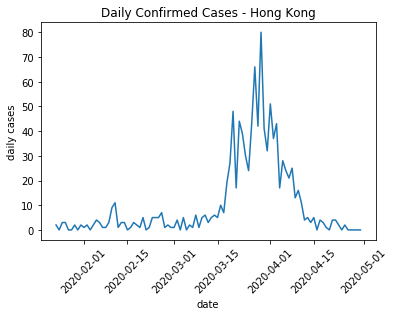

In [38]:
plt.plot(df.index.values, df['Hong_Kong'])
plt.title('Daily Confirmed Cases - Hong Kong')
plt.ylabel('daily cases')
plt.xlabel('date')
plt.xticks(rotation=45);

In [39]:
df_hk = df[['Hong_Kong', 'dayofweek']]
max_hk = df_hk['Hong_Kong'].argmax()
print('Max daily case in Hong Kong:', df_hk['Hong_Kong'][max_hk])
print('Date of max daily case in Hong Kong:', df.index[max_hk].date())

Max daily case in Hong Kong: 80.0
Date of max daily case in Hong Kong: 2020-03-29


In [40]:
# Days since first confirmed case in Hong Kong
first_hk = df['Hong_Kong'].ne(0).idxmax()
df_hk['days_since_first_hk'] = (df_hk.index - first_hk).days

# Create day of week categorical indicator variables
df_hk = pd.concat([df_hk.drop('dayofweek', axis=1), pd.get_dummies(df['dayofweek'], prefix='dayofweek', prefix_sep='_')], axis=1)
df_hk = df_hk.drop('dayofweek_0', axis = 1)

# Closed borders and businesses fixed effects
df_hk['closed_border'] = (df_hk.index >= '2020-03-25')
df_hk['closed_businesses'] = (df_hk.index >= '2020-04-01')

df_hk[first_hk:].head()

,Hong_Kong,days_since_first_hk,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,closed_border,closed_businesses
2020-01-23,2.0,0,0,0,1,0,0,0,False,False
2020-01-24,0.0,1,0,0,0,1,0,0,False,False
2020-01-25,3.0,2,0,0,0,0,1,0,False,False
2020-01-26,3.0,3,0,0,0,0,0,1,False,False
2020-01-27,0.0,4,0,0,0,0,0,0,False,False


In [41]:
# Smoothing splines time trend
x_spline_hk = df_hk['days_since_first_hk'][first_hk:]
bs_hk = BSplines(x_spline_hk, df=[90], degree=[10])

In [42]:
# Generalized Additive Model
gam_bs_hk = GLMGam.from_formula('Hong_Kong ~ closed_border + closed_businesses + dayofweek_1 + dayofweek_2 + dayofweek_3 + dayofweek_4 + dayofweek_5 + dayofweek_6', data=df_hk[first_hk:], smoother=bs_hk, alpha=1000, family=sm.families.Poisson())
res_bs_hk = gam_bs_hk.fit()

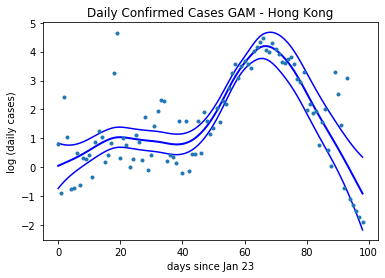

In [43]:
res_bs_hk.plot_partial(0, cpr=True)
plt.title('Daily Confirmed Cases GAM - Hong Kong')
plt.ylabel('log (daily cases)')
plt.xlabel('days since Jan 23');

In [44]:
print(res_bs_hk.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Hong_Kong   No. Observations:                   99
Model:                         GLMGam   Df Residuals:                    82.78
Model Family:                 Poisson   Df Model:                        15.22
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -239.22
Date:                Tue, 05 May 2020   Deviance:                       179.96
Time:                        13:08:34   Pearson chi2:                     180.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### <a class="anchor" id="forecast">Forecast daily confirmed cases in Hong Kong for the next 30 days</a>

In [45]:
# Design matrix for forecasting the next 30 days
df_hk_pred = pd.DataFrame(df_hk['days_since_first_hk'][-1] + list(range(30)), columns = ['days_since_first_hk'])
df_hk_pred.index = pd.date_range(start=df_hk.index[-1], periods=30)
df_hk_pred['dayofweek'] = df_hk_pred.index.values
df_hk_pred['dayofweek'] = df_hk_pred['dayofweek'].dt.dayofweek
df_hk_pred = pd.concat([df_hk_pred.drop('dayofweek', axis=1), pd.get_dummies(df_hk_pred['dayofweek'], prefix='dayofweek', prefix_sep='_')], axis=1)
df_hk_pred['closed_border'] = 1
df_hk_pred['closed_facilities'] = 1
df_hk_pred = df_hk_pred.drop('dayofweek_0', axis = 1)

In [46]:
df_hk_pred.head()

,days_since_first_hk,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,closed_border,closed_facilities
2020-04-30,98,0,0,1,0,0,0,1,1
2020-05-01,99,0,0,0,1,0,0,1,1
2020-05-02,100,0,0,0,0,1,0,1,1
2020-05-03,101,0,0,0,0,0,1,1,1
2020-05-04,102,0,0,0,0,0,0,1,1


#### Unfortunately, when data points fall outside of the boundary outermost knots (the first and last dates), there is not yet a concensus on how to handle them (splev and R handle them differently) in the statistical community. Therefore, the current package on Python does not support time series forecasting and we may only answer questions requiring descriptive or inferential statistics. Additional time series analysis and Monte Carlo simulations is neccessary for forecasting. We will look at forecasting in the upcoming project. The code below will result in an error for predicting points outside of the boundaries.

In [ ]:
res_bs_hk.predict(exog = df_hk_pred, exog_smooth = np.asarray(df_hk_pred[['days_since_first_hk']]))